# MAJOR PROJECT

Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import r2_score
import re
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline

# EDA

In [4]:
uc=pd.read_excel('Data_Train.xlsx')

In [5]:
uc.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


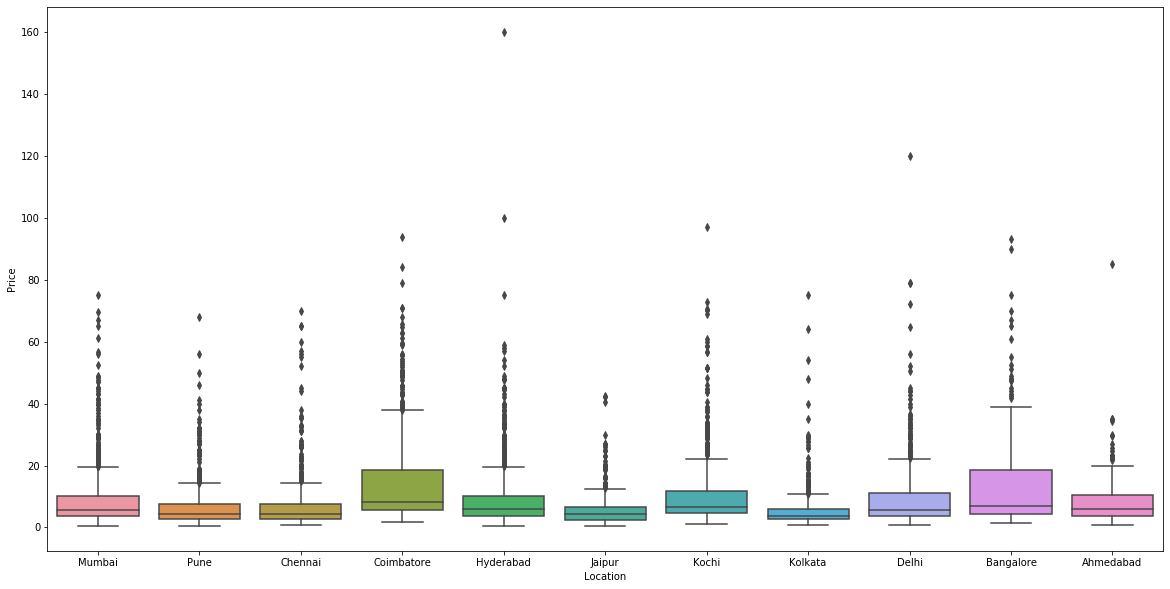

In [5]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Location',data=uc)

All location price ranges are equally spread except Combitore and Banglore whose median value is less and spread is high hence location cant be considered as major feature

[(0, 160), (0, 700000)]

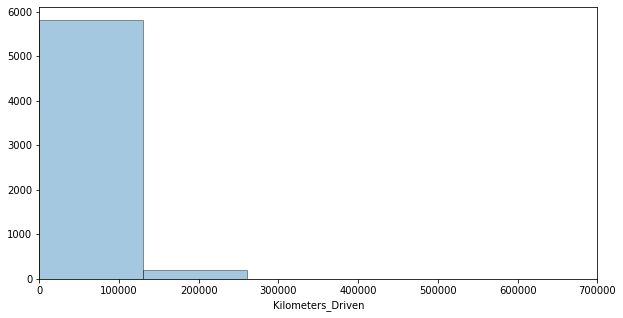

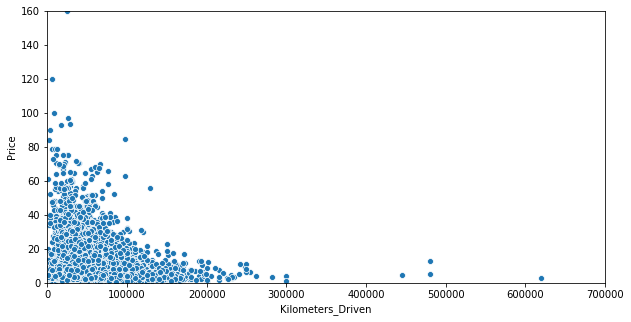

In [6]:
plt.figure(figsize=(10,5))
k=sns.distplot(uc['Kilometers_Driven'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1))
k.set(xlim=(0,700000))
plt.figure(figsize=(10,5))
p=sns.scatterplot(y='Price',x='Kilometers_Driven',data=uc)
p.set(xlim=(0,700000),ylim=(0,160))

For Kilometers driven we can see majorly cars for resale are in range of 0–100k kms and there is negative relationship as Kilometer_Driven is increasing with price.

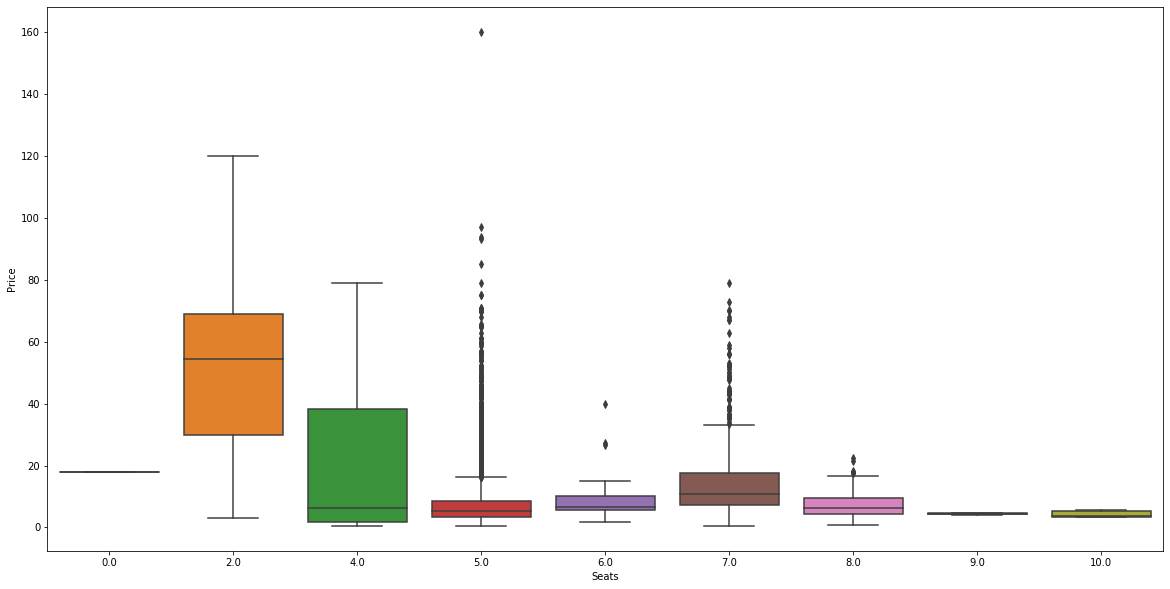

In [7]:
plt.figure(figsize=(20,10))
s=sns.boxplot(x='Seats',y='Price',data=uc)

2 and 4 seaters cars have large spread and range is high for 2 seaters but other 5 seaters and above have same spread with lot of outliers in 5 and 7 seaters.

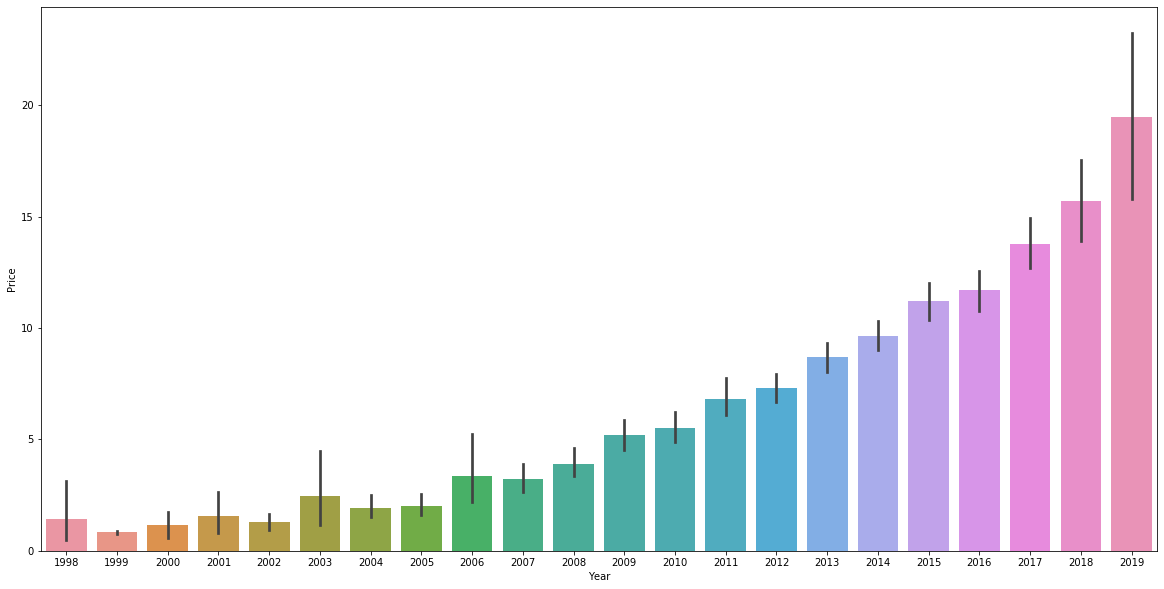

In [8]:
plt.figure(figsize=(20,10))
s=sns.barplot(x='Year',y='Price',data=uc)

Clearly we can see that as the age of the car increases Price

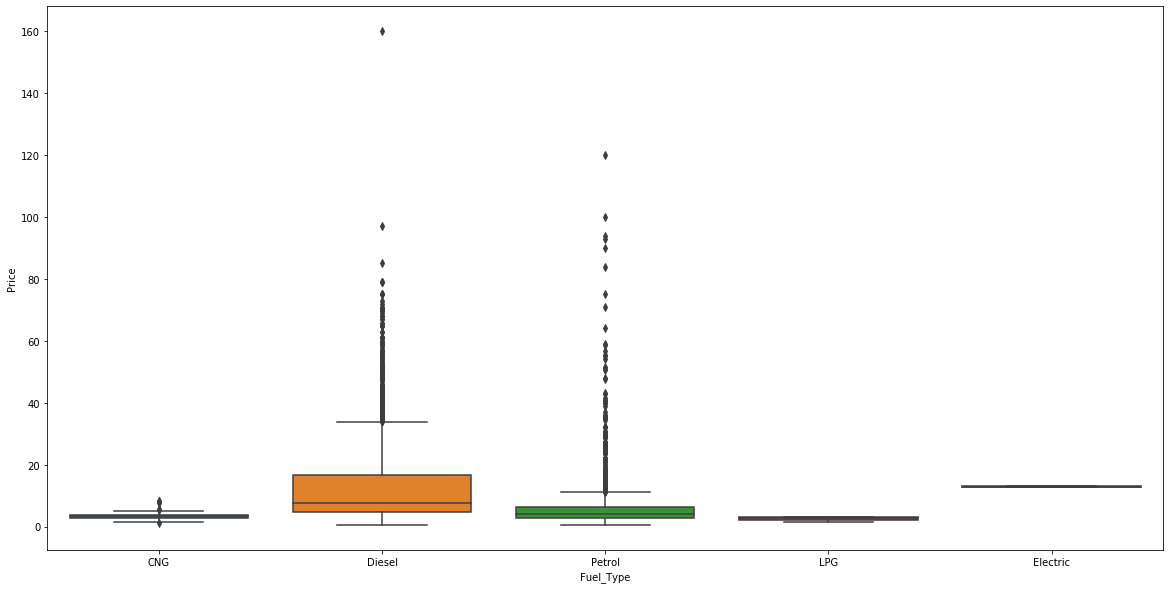

In [9]:
plt.figure(figsize=(20,10))
s=sns.boxplot(x='Fuel_Type',y='Price',data=uc)

Most Cars are sold in diesel and petrol and the price range is more spread in diesel cars followed by petrol Also we can see that electric cars have higher price range

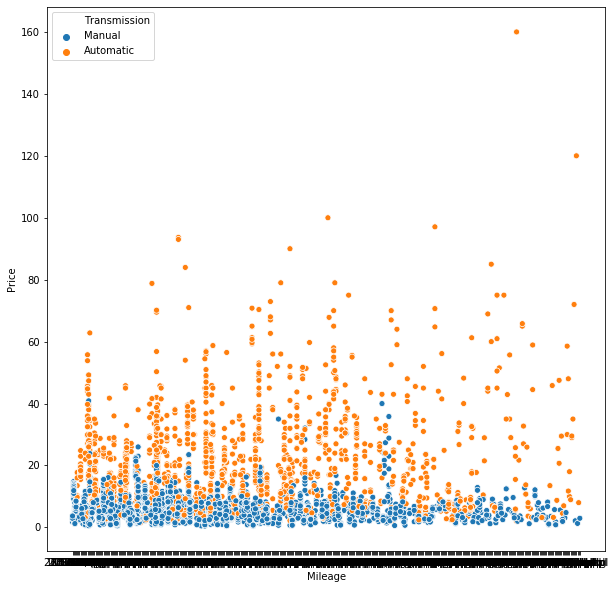

In [11]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x='Mileage',y='Price',hue='Transmission',data=uc)

Mileage spread is not giving any linear relationship. The thing we can notice is automatic cars has higher range as saw before also

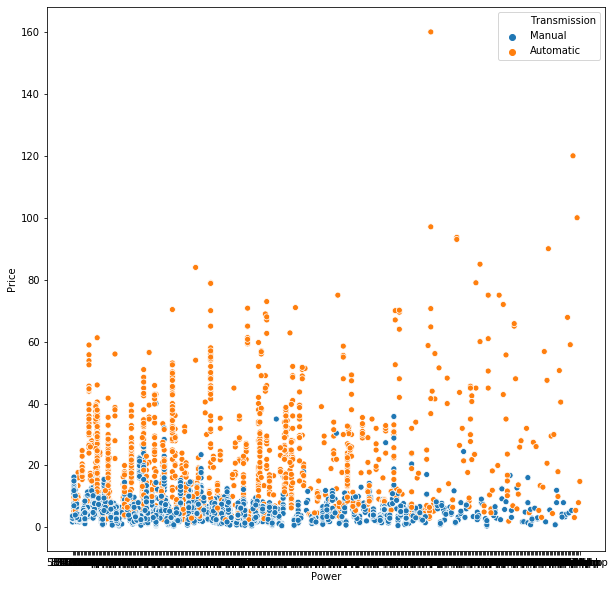

In [12]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x='Power',y='Price',hue='Transmission',data=uc)

Power has high correlation linear with price and above 300 HP only automatic cars there.

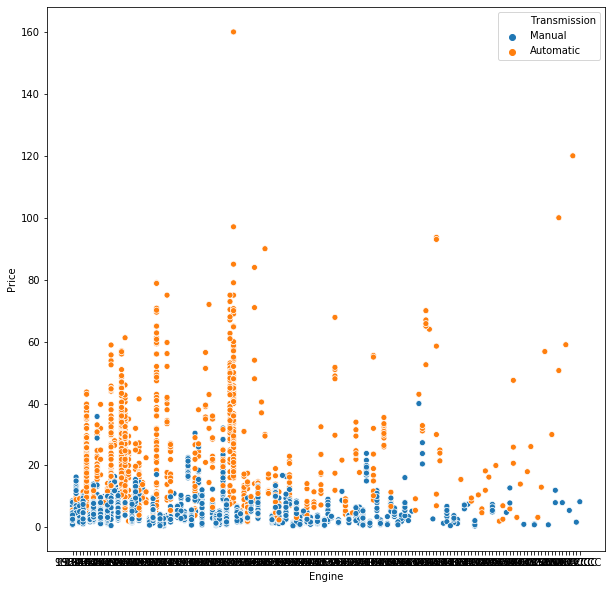

In [13]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x='Engine',y='Price',hue='Transmission',data=uc)

Engine also has high correlation linear with price and above 3000 cc only automatic cars there. So, let’s see engine and power correlation also if they both are also highly correlated As, we can see engine and power are highly correlated which can cause multi collinearity. While moving to model building we have to do test for multi collinearity and remove one of them if they are dependent on each other to apply linear regression model.

So, by above analysis we can see below features are playing important role in deciding resale price of car which we can use in for our model building. Important Features: Categorical: - Brand ,Model Year ,Owner Type ,Transmission Continuous: - Power ,Engine ,Kilometers_Driven ,New_Price

# ANALYSIS

In [15]:
cars_train = pd.read_excel('Data_Train.xlsx')
cars_test = pd.read_excel('Data_Test.xlsx')

In [16]:
len(cars_train)

6019

In [17]:
cars_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


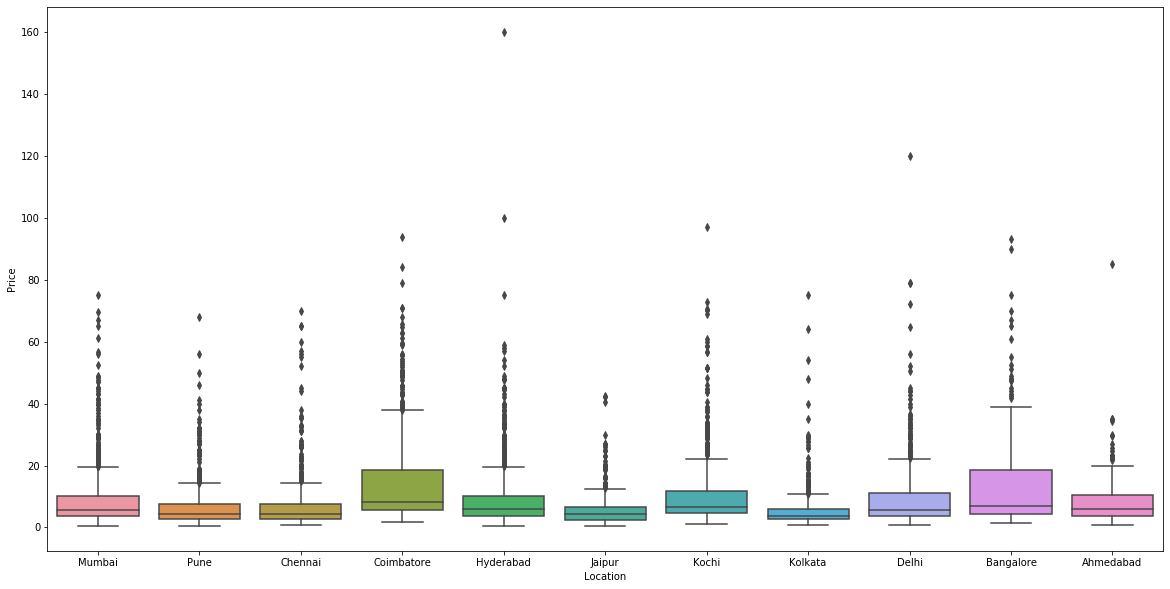

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Location',data=cars_train)

[(0, 160), (0, 700000)]

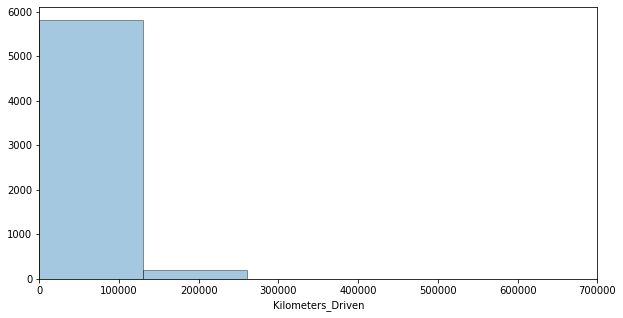

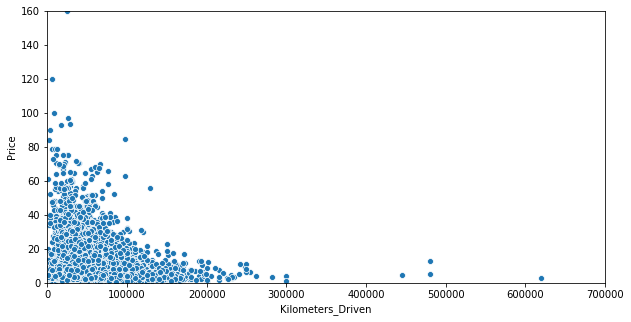

In [19]:
plt.figure(figsize=(10,5))
k=sns.distplot(cars_train['Kilometers_Driven'],kde=False,hist_kws=dict(edgecolor="k", linewidth=1))
k.set(xlim=(0,700000))
plt.figure(figsize=(10,5))
p=sns.scatterplot(y='Price',x='Kilometers_Driven',data=cars_train)
p.set(xlim=(0,700000),ylim=(0,160))

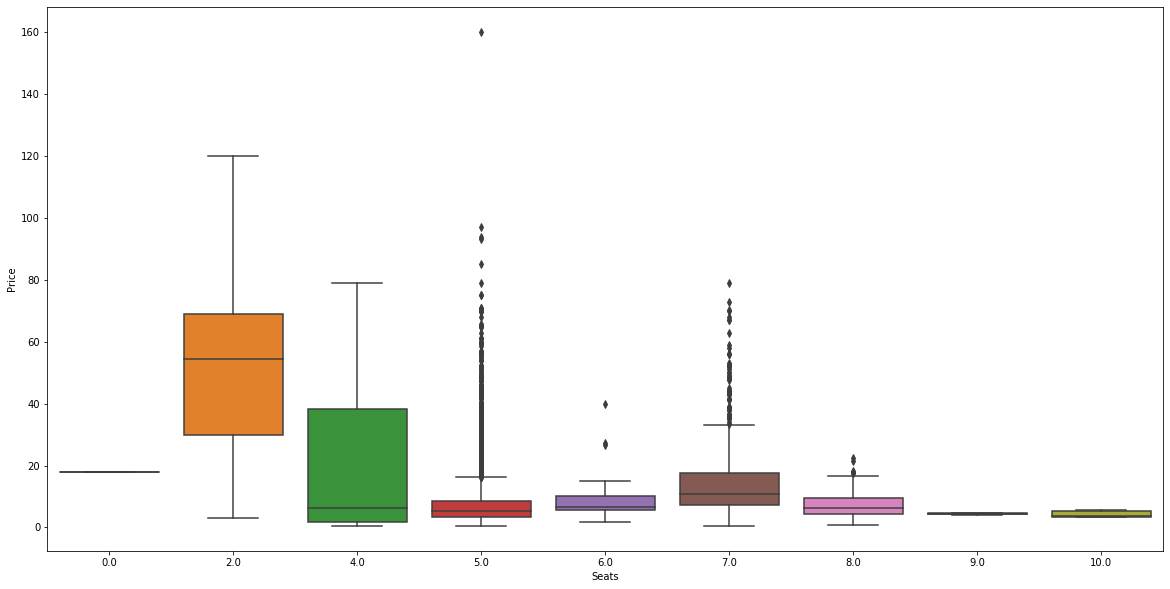

In [20]:
plt.figure(figsize=(20,10))
s=sns.boxplot(x='Seats',y='Price',data=cars_train)

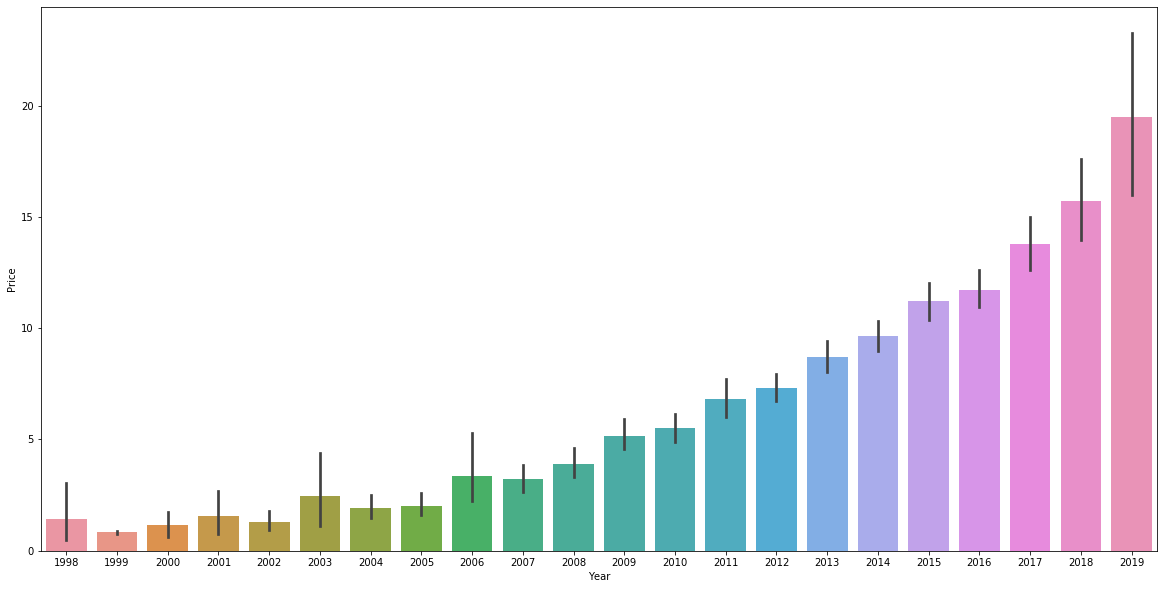

In [21]:
plt.figure(figsize=(20,10))
s=sns.barplot(x='Year',y='Price',data=cars_train)

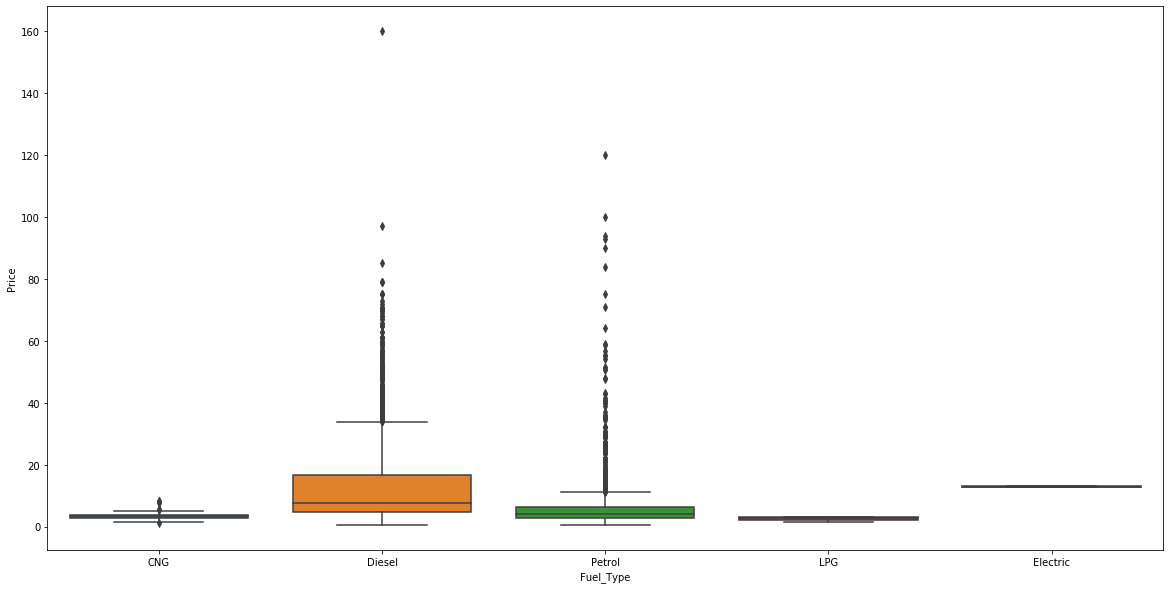

In [22]:
plt.figure(figsize=(20,10))
s=sns.boxplot(x='Fuel_Type',y='Price',data=cars_train)

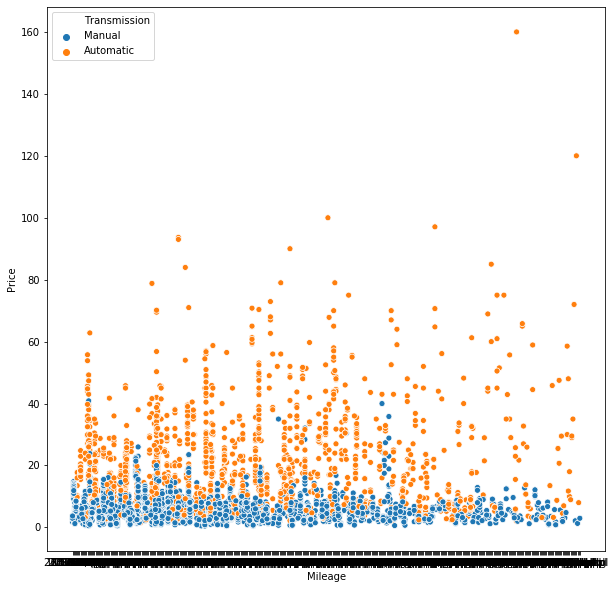

In [23]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x='Mileage',y='Price',hue='Transmission',data=cars_train)

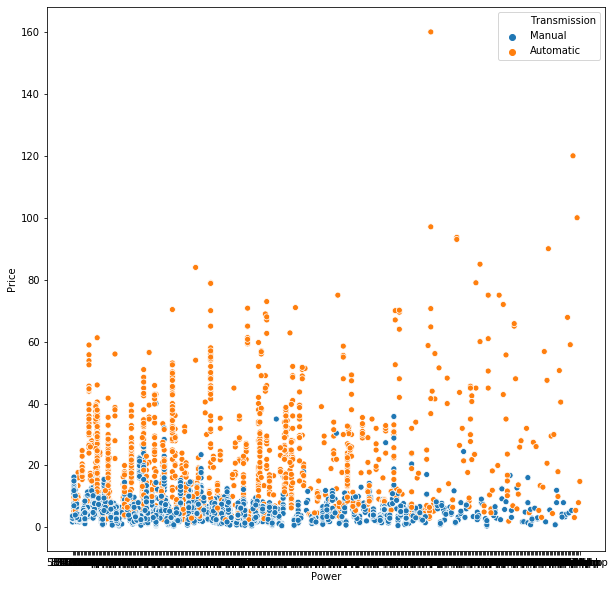

In [24]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x='Power',y='Price',hue='Transmission',data=cars_train)

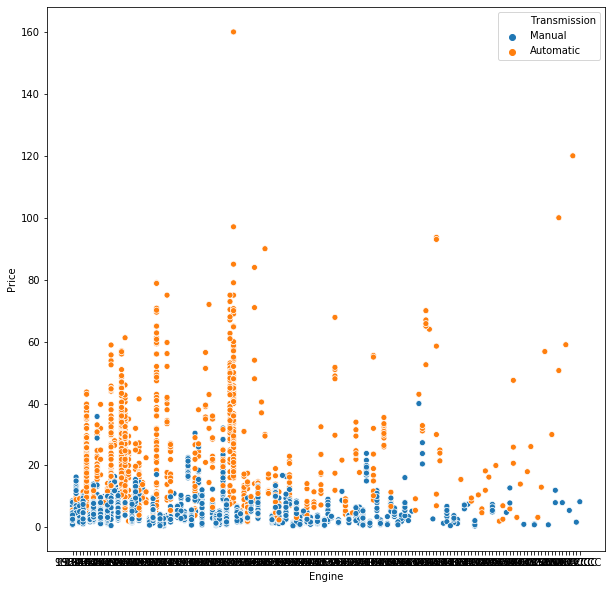

In [30]:
plt.figure(figsize=(10,10))
s=sns.scatterplot(x='Engine',y='Price',hue='Transmission',data=cars_train)

In [35]:
#data=cars_train

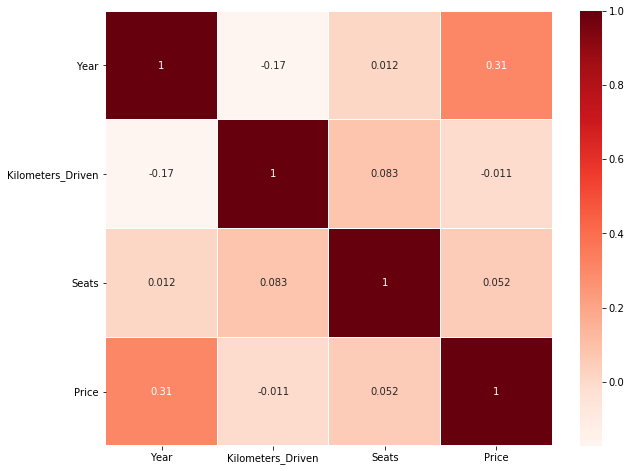

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='Reds',linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [39]:
data=cars_train.append(cars_test, ignore_index=True, sort=False)
len(data)

7253

In [41]:
cars_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [42]:
data['Car_Brand1'] = data['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))
data['Car_Brand2'] = data['Name'].apply(lambda x: ' '.join(x.split(' ')[2:]))
data.drop(columns=["Name"], axis=1, inplace=True)

In [43]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand1,Car_Brand2
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi A4,New 2.0 TDI Multitronic


In [44]:
data['Seats'].mode()

0    5.0
dtype: float64

In [45]:
data["Seats"].fillna(value = 5.0, inplace=True)
data.Seats[data.Seats == 0.0] = 5.0

In [46]:
data['Mileage'] = data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
data['Mileage'].mode()

0    17.0
dtype: float64

In [47]:
data['Mileage'].fillna(value = 17.0, inplace = True)
data.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                   0
Price                1234
Car_Brand1              0
Car_Brand2              0
dtype: int64

In [48]:
data['Engine'] = data['Engine'].apply(lambda x : str(x).split(' ')[0]).astype(float)
data['Engine'].mode()

0    1197.0
dtype: float64

In [49]:
data['Engine'].fillna(value = 1197.0, inplace = True)
data.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  46
Seats                   0
Price                1234
Car_Brand1              0
Car_Brand2              0
dtype: int64

In [50]:
data['Power'] = data['Power'].str.split(' ').str[0]
data.Power[data.Power == 'null'] = np.NaN
data['Power'].isnull().sum()

175

In [51]:
data['Power'] = data['Power'].astype(float)
data['Power'].mode()

0    74.0
dtype: float64

In [52]:
data['Power'].fillna(value = 74, inplace = True)
data.isna().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Car_Brand1              0
Car_Brand2              0
dtype: int64

In [53]:
data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_Brand1            object
Car_Brand2            object
dtype: object

In [54]:
data['Year'] = data['Year'].astype(float)
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(float)

In [55]:
del data['Location']

In [56]:
data = pd.get_dummies(data, drop_first = True)

In [57]:
len(data)

7253

In [58]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Car_Brand2_xDrive 30d Design Pure Experience 5 Seater,Car_Brand2_xDrive 30d M Sport,Car_Brand2_xDrive 40d,Car_Brand2_xDrive 40d M Sport,Car_Brand2_xDrive20d,Car_Brand2_xDrive20d Advantage Edition,Car_Brand2_xDrive20d Expedition,Car_Brand2_xDrive20d xLine,Car_Brand2_xDrive30d,Car_Brand2_xDrive30d M Sport
0,2010.0,72000.0,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000.0,19.67,1582.0,126.20,5.0,12.50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000.0,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000.0,20.77,1248.0,88.76,7.0,6.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670.0,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
len(cars_test)

1234

In [60]:
train_data = data[data['Price'].isnull()!=True]
test_data = data[data['Price'].isnull()==True]
test_data.drop('Price', axis=1, inplace=True)

In [61]:
train_data.shape, test_data.shape

((6019, 2130), (1234, 2129))

In [62]:
train_data['Price'] = np.log1p(train_data['Price'])

In [63]:
X = train_data.drop(labels=['Price'], axis=1)
y = train_data['Price'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [65]:
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [66]:
y_pred_1 = regressor.predict(X_test)

In [67]:
y_pred_1 = regressor.predict(X_test)

In [68]:
y_pred_1 = regressor.predict(X_test)

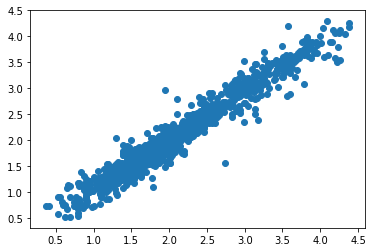

In [69]:
plt.scatter(y_test,y_pred_1)

In [70]:
y_pred = regressor.predict(test_data)

In [71]:
y_pred

array([1.43815729, 1.17026095, 2.91122778, ..., 1.55267363, 1.69958831,
       2.96422459])

In [72]:
cars_test['Predicted Price'] = y_pred.tolist()

In [73]:
cars_test['Predicted Price'] = np.expm1(cars_test['Predicted Price'])

In [74]:
cars_test.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,3.212925
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,2.222834
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,17.379350
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,2.773427
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,4.847106
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,12.545860
6,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.7 bhp,7.0,20.663391
7,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,2.886727
8,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,4.263652
9,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,9.642271
